# Machine Learning to Predict Titanic Survivors 
<p></p>
<center><a href='https://www.pelispedia.tv/pelicula/titanic/'><img  src='img/front.jpg'/></a></center>

By Daniel Bridera [danielbridera@gmail.com]<br>
Data Scientist | Machine Learning Engineer at Eureka Labs<br>

# Contenido
1. [Importando librerias y paquetes](#p1)
2. [Carga y análisis del dataset](#p2)
3. [Visualización de datos](#p3)
4. [Imputación: Manejando ausencia de datos (Missing data, NaN values)](#p4)
5. [Feature Engineering](#p5)
6. [Split Training and Test Sets](#p6)
7. [Model Fitting and Predicting](#p7)
8. [Evaluating Model Performances](#p8)
9. [Tuning Parameters with GridSearchCV](#p9)

<a id="p1"></a>
# 1. Importando librerias y paquetes


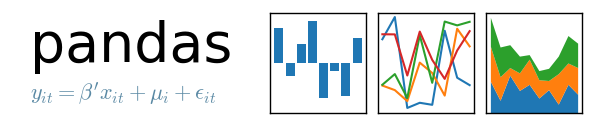
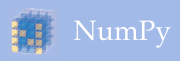
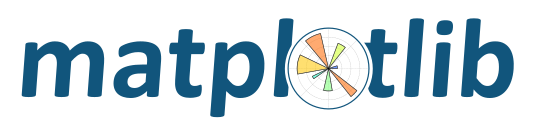
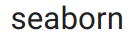
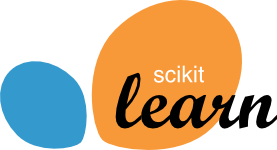

**Pandas** https://pandas.pydata.org/ <br>
**Matplotlib** https://matplotlib.org/<br>
**Searborn** https://seaborn.pydata.org/<br>
**Numpy**  http://www.numpy.org/<br>
**Scikit-learn** http://scikit-learn.org


In [1]:
import numpy as np 
import pandas as pd
from collections import Counter
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

<a id="p2"></a>
# 2. Carga y análisis del dataset

Démosle una mirada a los datos con los que vamos a jugar (By using Pandas)


In [2]:
# get titanic & test csv files as a DataFrame
training = pd.read_csv("data/train.csv")

In [3]:
training.head() # print first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training.describe() # some interesting statistics for features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(training.keys()) # Show features names


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


[More information on the Kaggle site](https://www.kaggle.com/c/titanic/data)<br>
**Variable Description**
 - Survived: Survived (1) or died (0)
 - Pclass: Passenger's class
 - Name: Passenger's name
 - Sex: Passenger's sex
 - Age: Passenger's age
 - SibSp: Number of siblings/spouses aboard
 - Parch: Number of parents/children aboard
 - Ticket: Ticket number
 - Fare: Fare
 - Cabin: Cabin
 - Embarked: Port of embarkation


In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# Eliminamos columnas que no usaremos
training = training.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)

In [8]:
training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<a id="p3"></a>
# 3. Visualización de datos

Es muy (muy) importante **entender** y **visualizar** los datos que describen nuestro problema.
En la siguiente seccion veremos tendencias y asociaciones de variables como Sex, Pclass y Age vs ratio de supervivencia

<center><img src="img/importante.jpg"/></center>

## Sex Feature

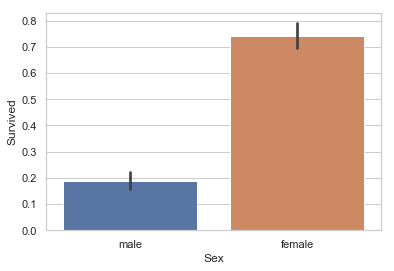

In [9]:
# Survived rate by sex
sns.barplot(x="Sex", y="Survived", data=training); 


## Pclass Feature

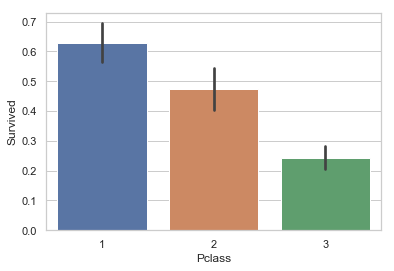

In [10]:
# Survived rate by Pclass
sns.barplot(x="Pclass", y="Survived", data=training)


## Embarked feature

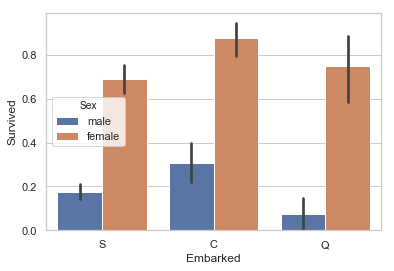

In [11]:
# Survived rate by Embarked
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=training);


## Pclass by Sex vs Survived

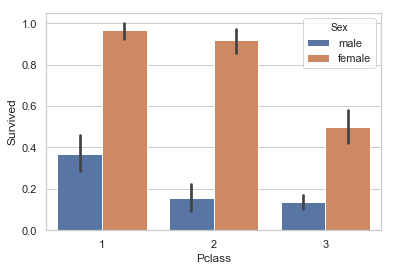

In [12]:
# Survived rate by Pclas and Sex
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training);


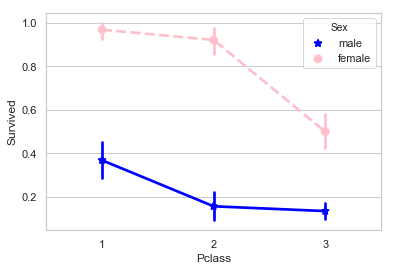

In [13]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=training,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);


## Age Feature

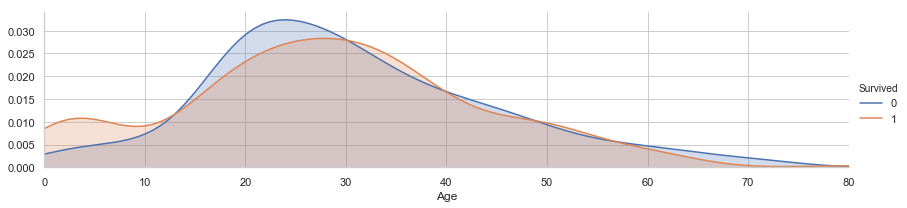

In [14]:
# peaks for survived/not survived passengers by their age

facet = sns.FacetGrid(training, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, training['Age'].max()))
facet.add_legend()



<a id="p4"></a>
# 4. Imputación: Manejando ausencia de datos (Missing data, NaN values)

La mayoria de los modelos de ML requieren que todas las variables tengan valores definidos.
El método más simple para llenar estos valores faltantes es usando el promedio/mediana/moda de la variable teniendo en cuenta todas las observaciones en nuestro set.


In [15]:
# Filling missing age values with median
training.Age = training.Age.fillna(training.Age.median())


In [16]:
training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
# Age is now completed
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Busquemos el valor más observado en la variable Embarked (Moda)

In [18]:
print(Counter(training.Embarked.values))

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})


In [19]:
training.Embarked = training.Embarked.fillna('S')

<a id="p5"></a>
# 5. Feature Engineering

Debido a que los valores de las variables Embarked y Sex son categóricas, debemos representar esos Strings como valores numéricos para poder hacer la clasificación. Podemos usar **One-Hot-Encoding** de SKlearn o **get_dummies** de Pandas.

In [20]:
embark_dummies_titanic  = pd.get_dummies(training['Embarked'])
sex_dummies_titanic  = pd.get_dummies(training['Sex'])

In [21]:
embark_dummies_titanic.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
sex_dummies_titanic.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


## Analicemos la variable Pclass

In [23]:
Counter(training.Pclass.values)

Counter({3: 491, 1: 216, 2: 184})

Moraleja: Podemos pensar Pclass como una variable categórica

In [24]:
pclass_dummies_titanic  = pd.get_dummies(training['Pclass'], prefix="Class")

## Armamos nuestro dataset final

In [25]:
training = training.drop(['Embarked', 'Sex', 'Pclass'], axis=1)

In [26]:
titanic = training.join([embark_dummies_titanic, sex_dummies_titanic, pclass_dummies_titanic])
titanic.head()

,Survived,Age,SibSp,Parch,Fare,C,Q,S,female,male,Class_1,Class_2,Class_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


<a id="p6"></a>
# 6. Split Training and Test Sets


In [27]:
from sklearn.model_selection import train_test_split

<center><img src="img/andrew.png"/></center>

In [28]:
X_all = titanic.drop('Survived', axis=1)
y_all = titanic.Survived

In [29]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [30]:
X_train.shape

(712, 12)

In [31]:
X_test.shape

(179, 12)

In [32]:
y_train.shape

(712,)

In [33]:
y_test.shape

(179,)

<a id="p7"></a>
# 7. Model Fitting and Predicting
Ahora que tenemos los datos preprocesados y formateados acordemente (y sobretodo que
entendemos con qué tipos de datos estamos trabajando) podemos empezar a construir nuestro modelo.
Usamos para este fin la libreria **sklearn**


## SVC Model

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

# Creating model
svc_clf = SVC(kernel="linear") #we can try different parameters
# Fitting model
svc_clf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Midiendo *Accuracy*

In [35]:
pred_svc = svc_clf.predict(X_test)
acc_svc = accuracy_score(y_test, pred_svc)

print(acc_svc)

0.7932960893854749


## Predicción
### Queremos saber que pasó con nuestro dos pasajeros favoritos...


<center><img src="img/titanic.png"/></center>

### Rose DeWiit Bukater
 - Pclass: 1st Class
 - Sex: Female
 - Age: 17
 - SibSp: 0
 - Parch: 1
 - Fare: 53.1000
 - Embarked: 'S'

In [36]:
Rose_DeWiit_Bukater = [17, 0, 1, 53.1000, 0, 0, 1, 1, 0, 1, 0, 0 ]

In [37]:
svc_clf.predict([Rose_DeWiit_Bukater])

array([1])

### Jack Dawson
 - Pclass: 3rd Class
 - Sex: Male
 - Age: 23
 - SibSp: 0
 - Parch: 0
 - Fare: 0
 - Embarked: 'S'

In [38]:
Jack_Dawson = [23, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1 ]

In [39]:
svc_clf.predict([Jack_Dawson])

array([0])

<a id="p8"></a>
# 8. Evaluating Model Performances
Usaremos diferentes modelos y evaluaremos la exactitud de sus predicciones
<center><img src="img/door.jpg"/></center>

## sklearn Models to Test

In [40]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


/Users/Ricky/anaconda3/envs/ai-session-01/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### LinearSVC Model

In [41]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_train, y_train)
pred_linsvc = linsvc_clf.predict(X_test)
acc_linsvc = accuracy_score(y_test, pred_linsvc)

print(acc_linsvc)

0.7541899441340782


###  RandomForest Model

In [42]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.8100558659217877


###  LogisiticRegression Model


In [43]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
pred_logreg = logreg_clf.predict(X_test)
acc_logreg = accuracy_score(y_test, pred_logreg)

print(acc_logreg)

0.770949720670391


### KNeighbors Model

In [44]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
pred_knn = knn_clf.predict(X_test)
acc_knn = accuracy_score(y_test, pred_knn)

print(acc_knn)

0.7374301675977654


## Comparando modelos

In [45]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.810056
0,SVC,0.793296
3,Logistic Regression,0.770950
1,Linear SVC,0.754190
4,K Nearest Neighbors,0.737430


<a id="p9"></a>
# 9. Tuning Parameters with GridSearchCV

Podemos ajustar valores de los parámetros de cada modelo y evaluar como se comporta el nuevo score.
GridSearchCv nos permite entrenar múltiples modelos y escoger el mejor de ellos.

In [46]:
# Dict of values to test
tuned_parameters = {'kernel': ['rbf', 'linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Fitting grid
clf = GridSearchCV(SVC(), tuned_parameters, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kernel': ['rbf', 'linear'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
# Getting best estimator
clf.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
# Best score
clf.best_score_

0.800561797752809

In [50]:
# Best params
clf.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

<center><img src="img/end.jpg"/></center>

# Preguntas <br>

<center><img src="img/calculando.jpg"/></center>